# **Simulación del Modelo de Ising con la dinámica Kawasaki**
### Física computacional 
**Javier Molina Motta**

**2025/07/09**

---

## Índice 
1. [Introducción](#Introducción)

---
## 1.Introducción
El modelo de Ising es un sistema fundamental en física estadística que permite estudiar cómo emergen fenómenos colectivos a partir de interacciones locales entre partículas. En este modelo, cada sitio de una red bidimensional contiene un espín que puede tomar los valores $ (+1) $ o $ (-1) $, representando dos orientaciones magnéticas posibles.

El sistema evoluciona según reglas que minimizan su energía total, que se calcula a partir de las interacciones entre espines vecinos. A temperaturas bajas, los espines tienden a alinearse, mientras que a temperaturas altas, el desorden térmico predomina.

Existe una **temperatura crítica $ T_c $** en la que el sistema experimenta una **transición de fase**: por debajo de $ T_c $ aparece una magnetización espontánea; por encima, el sistema se desordena completamente. Para una red bidimensional cuadrada sin campo externo, $ T_c \approx 2.269$ (en unidades donde $ J = k_B = 1 $).

Este proyecto estudia el comportamiento del sistema alrededor de esa temperatura crítica.

## 2.Simulación
Para simular el sistema, se utiliza una red cuadrada de tamaño $N\times N$ donde cada sitio contiene un espín que puede tomar los valores $(+1)$ o $(-1)$. La evolución se realiza mediante la dinámica de Kawasaki, que intercambia pares de espines opuestos seleccionados aleatoriamente, manteniendo constante la magnetización total.

Se aplica el algoritmo de Metropolis para decidir si el intercambio es aceptado en función del cambio de energía y de la temperatura del sistema. A lo largo de la simulación se calculan magnitudes físicas como la magnetización, energía, calor específico y susceptibilidad.

## Magnetización


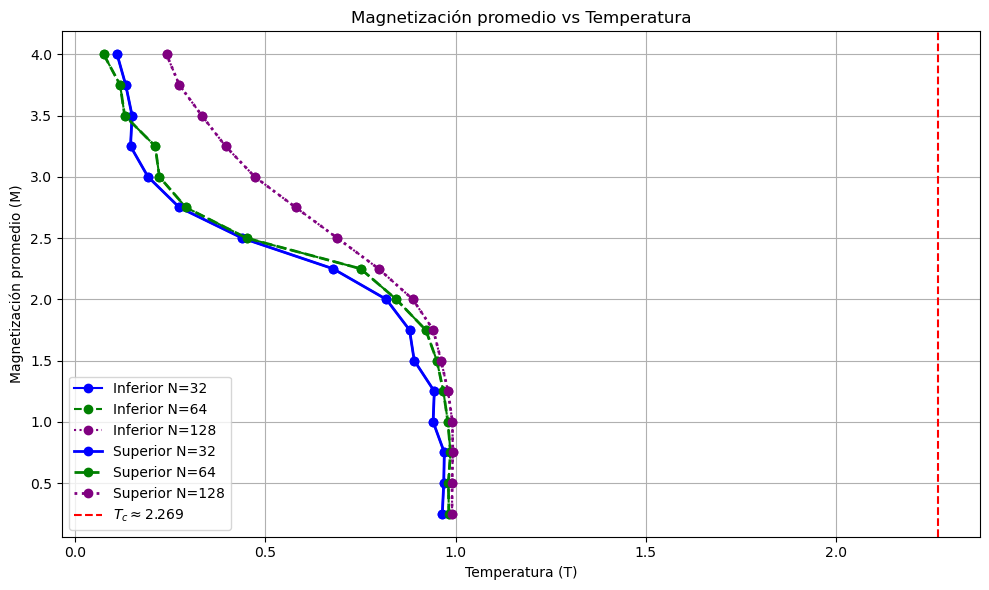

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

valores_N = [32, 64, 128]
colores = ['blue', 'green', 'purple']
estilos_inferior = ['-', '--', ':']
estilos_superior = ['-', '--', ':']

plt.figure(figsize=(10, 6))

for i, N in enumerate(valores_N):
    ruta = f'promedio_magnetizacioninferior{N}.txt'
    datos = np.loadtxt(ruta)
    T = datos[:, 0]
    M = datos[:, 1]
    plt.plot(T, M, linestyle=estilos_inferior[i], color=colores[i], marker='o', label=f'Inferior N={N}')

# Graficar archivos "superior"
for i, N in enumerate(valores_N):
    ruta = f'promedio_magnetizacionsuperior{N}.txt'
    datos = np.loadtxt(ruta)
    T = datos[:, 0]
    M = datos[:, 1]
    plt.plot(T, M, linestyle=estilos_superior[i], color=colores[i], linewidth=2, marker='o', label=f'Superior N={N}')

plt.axvline(2.269, color='red', linestyle='--', label=r'$T_c \approx 2.269$')

plt.title('Magnetización promedio vs Temperatura')
plt.xlabel('Temperatura (T)')
plt.ylabel('Magnetización promedio (M)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()